In [1]:
# imports
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import sys

from dreem_tools import plotting, parse

# general figure tweaks
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["font.size"] = 16
# to fight the theme
plt.rcParams["figure.facecolor"] = "white"

In [5]:
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(BASE_DIR)


In [6]:
from scripts.analysis.titration_fitting import curve_func_new

In [7]:
DATA_PATH = BASE_DIR + '/data'

In [8]:
df = pd.read_json(f"{DATA_PATH}/wt_mg_titra.json")
df_uucg = pd.read_json(f"{DATA_PATH}/uucg_mg_titra.json")

In [9]:
df = df[df['exp_name'] == "2022_07_27_C0117_50mM_NaC_Mg2+_titra_CM"]

In [15]:
def plot_tlr_res_against_mg2(df, bounds=[3, 10]):
    seq = "CCUAAGUAUGG"
    pal = sns.color_palette("tab10", 11)[::-1]
    colors = pal
    for i in range(bounds[0], bounds[1]):
        # not DMS active
        seq_pos = seq[i-1]
        if seq_pos == 'U' or seq_pos =='G':
            continue
        plt.plot(df["mg_conc"], df['tlr'].apply(lambda x : x[i-1]),
                 lw=2, marker='o', markersize=7, color=colors[i], 
                 label=str(i) + " " + seq_pos)
    plt.legend()
    plt.xlabel("mg_conc")
    plt.ylabel("normalized_reactivity")


def plot_tlr_single_res_against_mg2(df, pos, ax, label):
     ax.plot(df["mg_conc"], df['tlr'].apply(lambda x : x[pos-1]),
                 lw=2, marker='o', markersize=7, label=label)

    

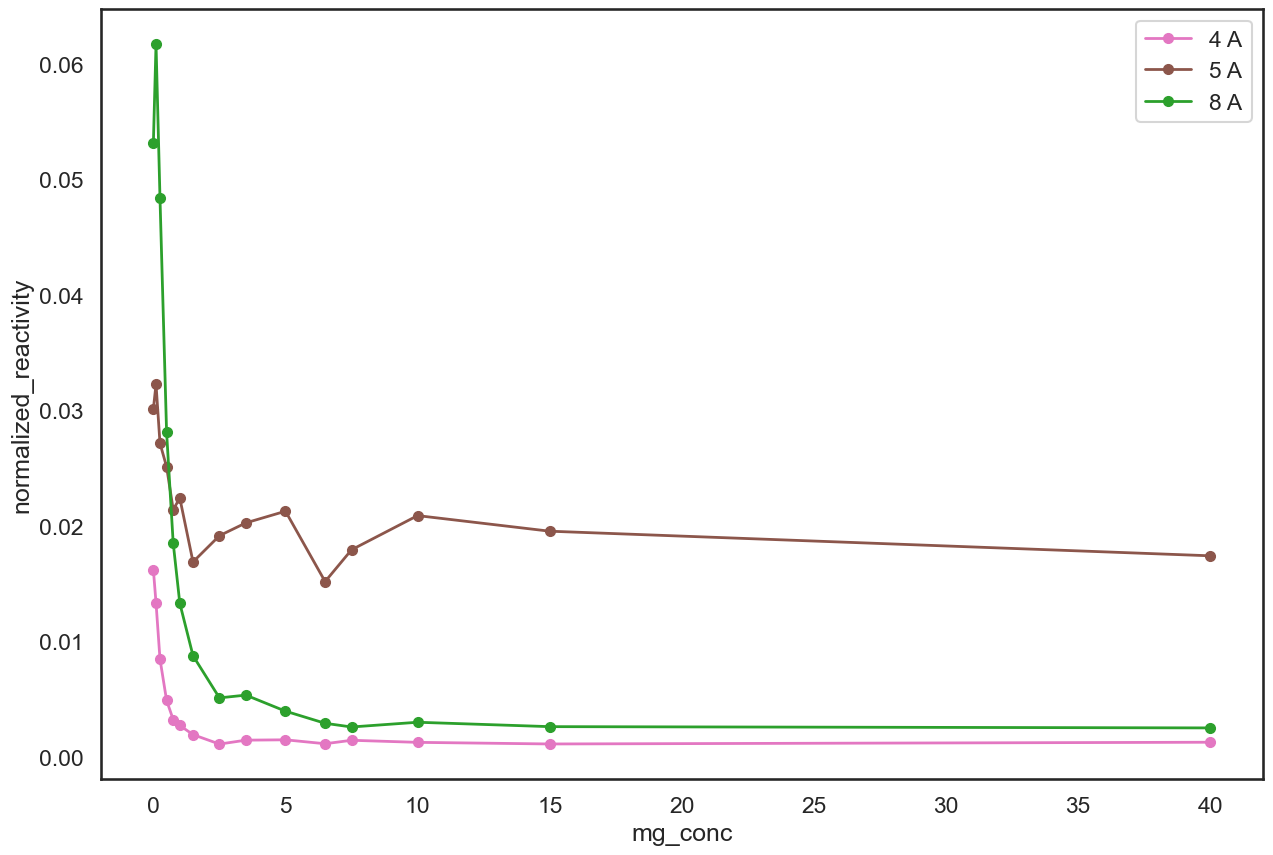

In [13]:
plot_tlr_res_against_mg2(df)

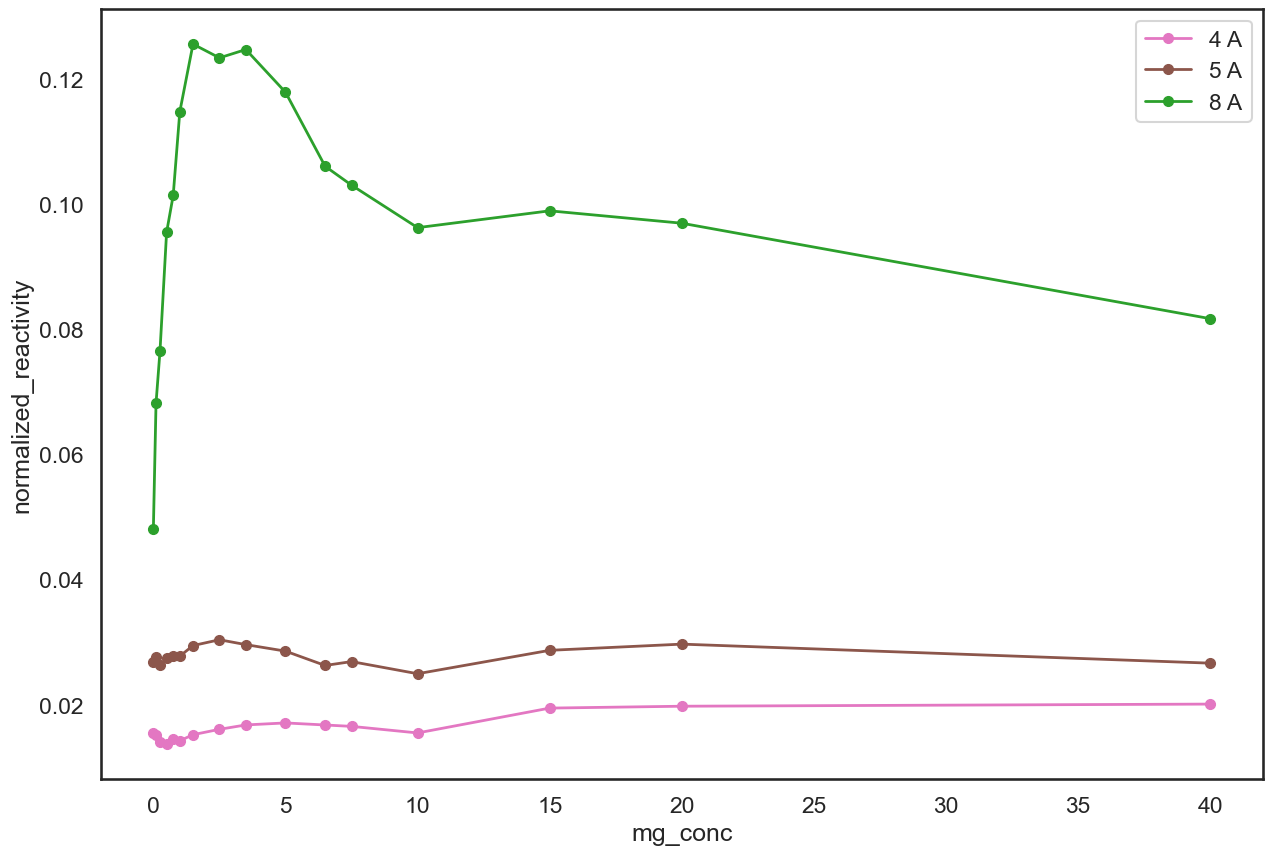

In [14]:
plot_tlr_res_against_mg2(df_uucg)

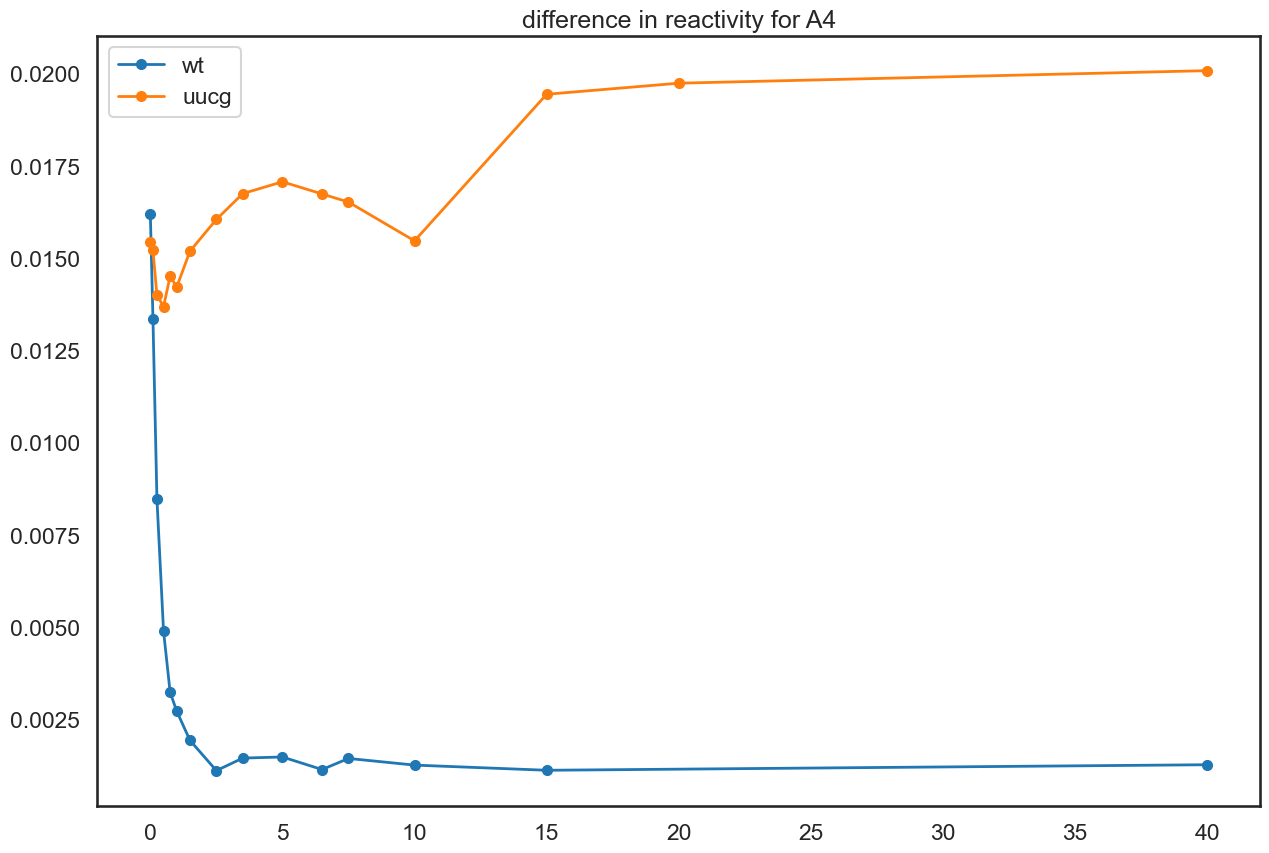

In [20]:
fig, ax = plt.subplots()
plot_tlr_single_res_against_mg2(df, 4, ax, "wt")
plot_tlr_single_res_against_mg2(df_uucg, 4, ax, "uucg")
ax.set_title("difference in reactivity for A4")
ax.legend()

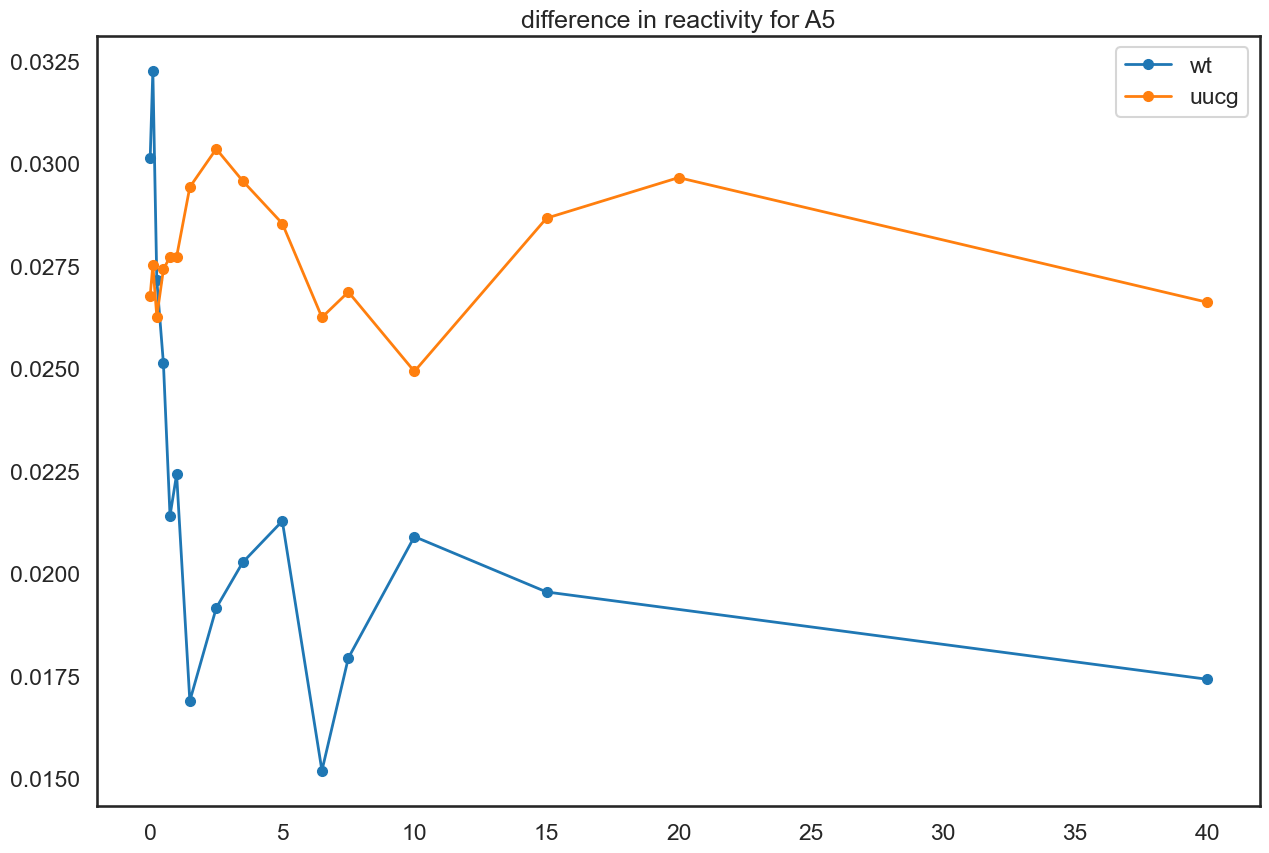

In [21]:
fig, ax = plt.subplots()
plot_tlr_single_res_against_mg2(df, 5, ax, "wt")
plot_tlr_single_res_against_mg2(df_uucg, 5, ax, "uucg")
ax.set_title("difference in reactivity for A5")
ax.legend()

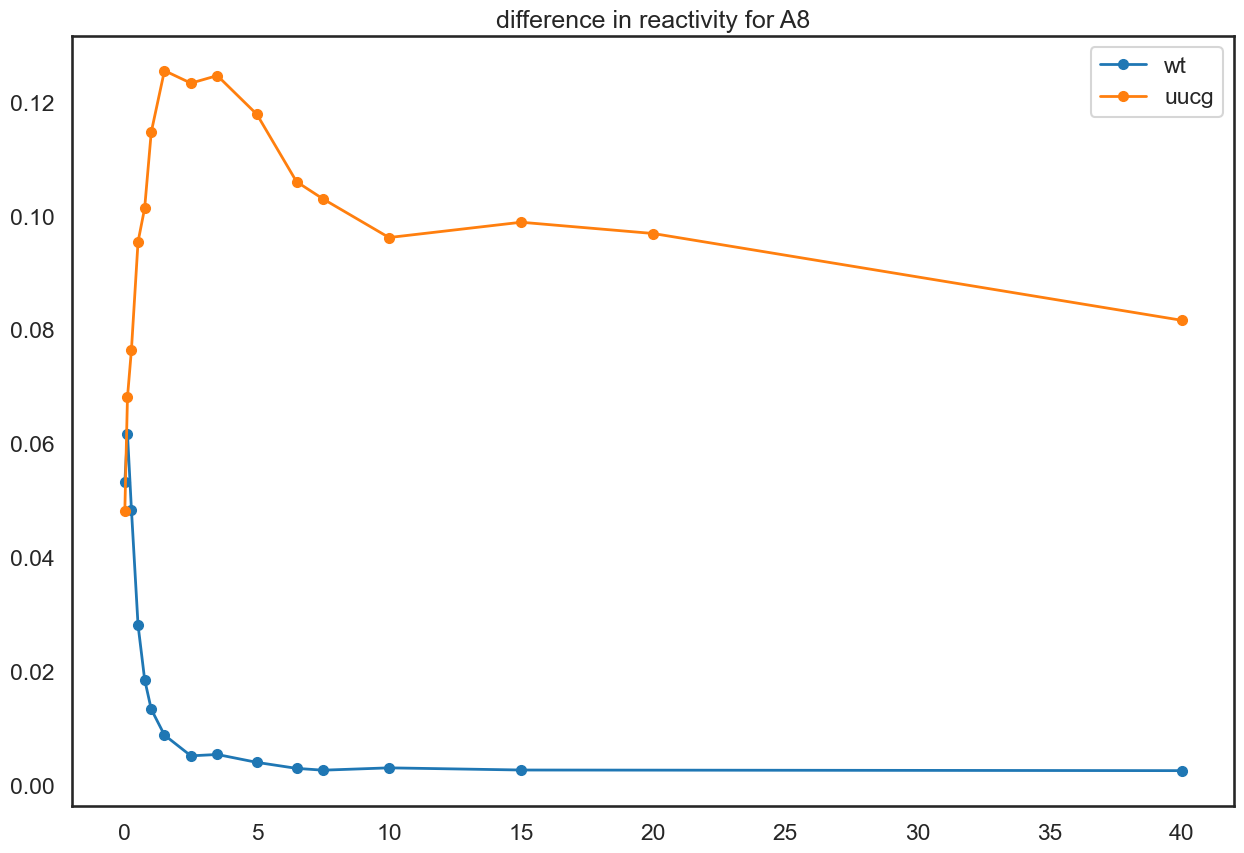

In [22]:
fig, ax = plt.subplots()
plot_tlr_single_res_against_mg2(df, 8, ax, "wt")
plot_tlr_single_res_against_mg2(df_uucg, 8, ax, "uucg")
ax.set_title("difference in reactivity for A8")
ax.legend()